#📌 프로젝트 주제
"와인의 화학적 특성과 종류를 바탕으로 품질 등급을 예측하는 분류 모델 개발"

## 주제 설명
Dacon에서 제공하는 와인 품질 데이터셋을 이용하여, 각 와인의 화학적 성분(산도, 당도, 알코올 도수 등)과 종류(레드/화이트)에 기반해 해당 와인의 **품질 등급(quality)**을 예측하는 것이 목표.

품질 등급은 0~10 사이의 정수로 주어지며, 이를 분류 문제로 다룸. 이 과정에서 머신러닝 알고리즘인 **Random Forest, Decision Tree, LightGBM, XGBoost**을 활용해 분석함.

## 기대 효과
- 어떤 성분이 와인의 품질을 좌우하는 핵심 요인인지 분석

- 새로운 와인에 대한 품질 예측 자동화 가능성 제시

- 실생활 응용 가능성: 와인 제조 공정 개선, 품질 기준 자동 평가 등



#데이터 변수 설명


| 변수명                      | 설명                                                                               |
| ------------------------ | -------------------------------------------------------------------------------- |
| **quality**              | 목표 변수(Target). 와인의 품질을 0-10 사이의 **정수 등급**으로 나타낸 것 (보통 3~~8 사이).                 |
| **fixed acidity**        | 고정산도. 주로 **주석산(tartaric acid)** 등 휘발되지 않는 산의 농도 (g/dm³). 산도는 와인의 신맛과 보존성에 영향을 줌. |
| **volatile acidity**     | 휘발산도. 주로 **아세트산**과 관련되며, 너무 많으면 불쾌한 냄새를 유발. (g/dm³)                              |
| **citric acid**          | 시트르산. 와인에 약간의 상큼함과 신선함을 추가하는 역할. 과일 풍미에 기여.                                      |
| **residual sugar**       | 잔당. 발효 후 남아 있는 **설탕의 양** (g/dm³). 적당히 많으면 달콤함을 주고 너무 많으면 품질 저하.                  |
| **chlorides**            | 염화물. **소금 성분**, 즉 염분 농도 (g/dm³). 너무 많으면 와인의 맛에 부정적 영향.                           |
| **free sulfur dioxide**  | 자유 이산화황. **보존제 역할**을 하며 박테리아와 산화 방지에 도움. 자유형은 즉시 활성화됨.                           |
| **total sulfur dioxide** | 총 이산화황. 자유형 + 결합형의 총합. 높은 값은 민감한 사람에게 두통을 유발할 수 있음.                              |
| **density**              | 밀도. 알코올 및 당의 함량에 따라 달라지며, 발효 정도를 간접적으로 파악할 수 있음.                                 |
| **pH**                   | 수소이온 농도지수. 산도의 척도이며 보통 2.8\~4.0 사이. 낮을수록 산성.                                     |
| **sulphates**            | 황산염. 보존성 강화 및 약간의 떫은 맛 제공. 살균 작용도 있음.                                            |
| **alcohol**              | 알코올 도수 (%). 와인의 바디감, 향, 맛에 결정적인 요소로, 일반적으로 높을수록 품질도 높게 평가되는 경향.                  |
| **type**                 | 와인 종류: **white = 0**, **red = 1**. (문자열을 숫자로 변환한 상태)                             |


# Data Loading



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
smpl_sub = pd.read_csv('sample_submission.csv')

# Data Preprocessing

In [3]:
# index 칼럼 삭제
train = train.drop('index', axis=1)
test = test.drop('index', axis=1)

In [4]:
# type 변수: 'white'=0 & 'red'=1 로 변경
train['type'] = train['type'].map({'white':0, 'red':1}).astype(int)
test['type'] = test['type'].map({'white':0, 'red':1}).astype(int)

In [5]:
train.head()

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,0
1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,1
2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,0
3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,0
4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,0


In [6]:
test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,0
1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,1
2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,0
3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,0
4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,0


# EDA

In [7]:
train.isnull().sum()

,0
quality,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0


In [8]:
test.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [9]:
smpl_sub.head()

,index,quality
0,0,0
1,1,0
2,2,0
3,3,0
4,4,0


In [10]:
smpl_sub.isnull().sum()

,0
index,0
quality,0


<Axes: >

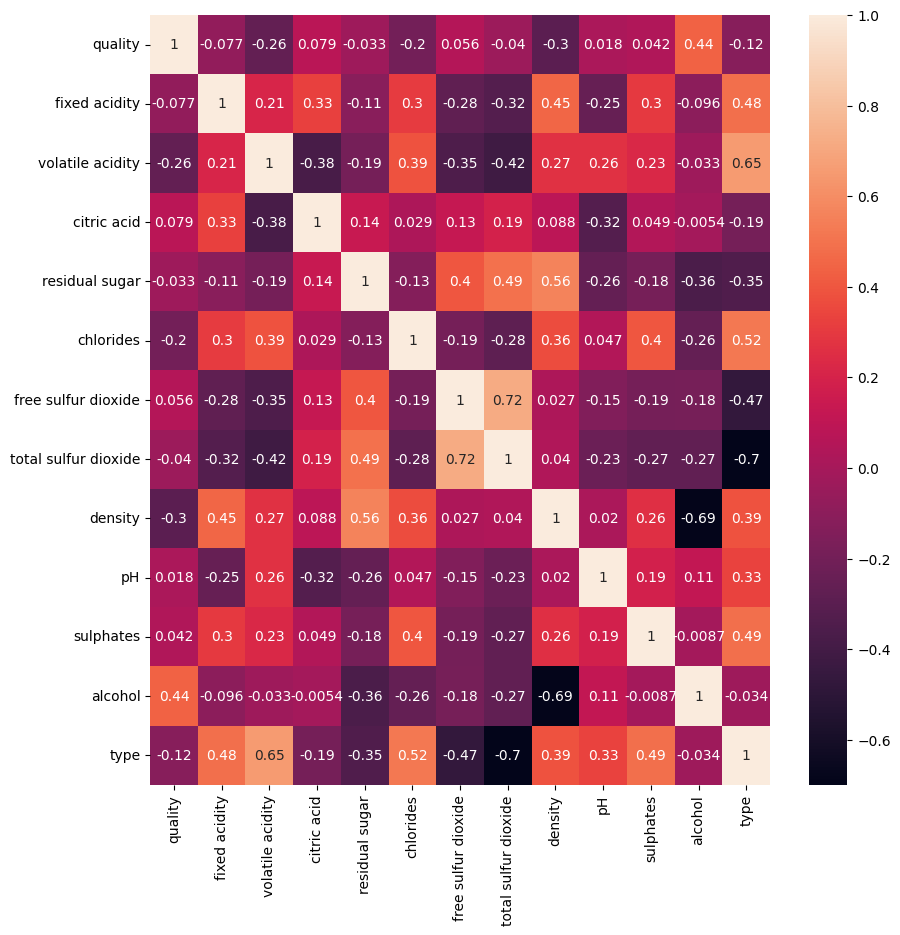

In [11]:
# 변수간 상관관계
plt.figure(figsize=(10,10))
sns.heatmap(data=train.corr(), annot = True)

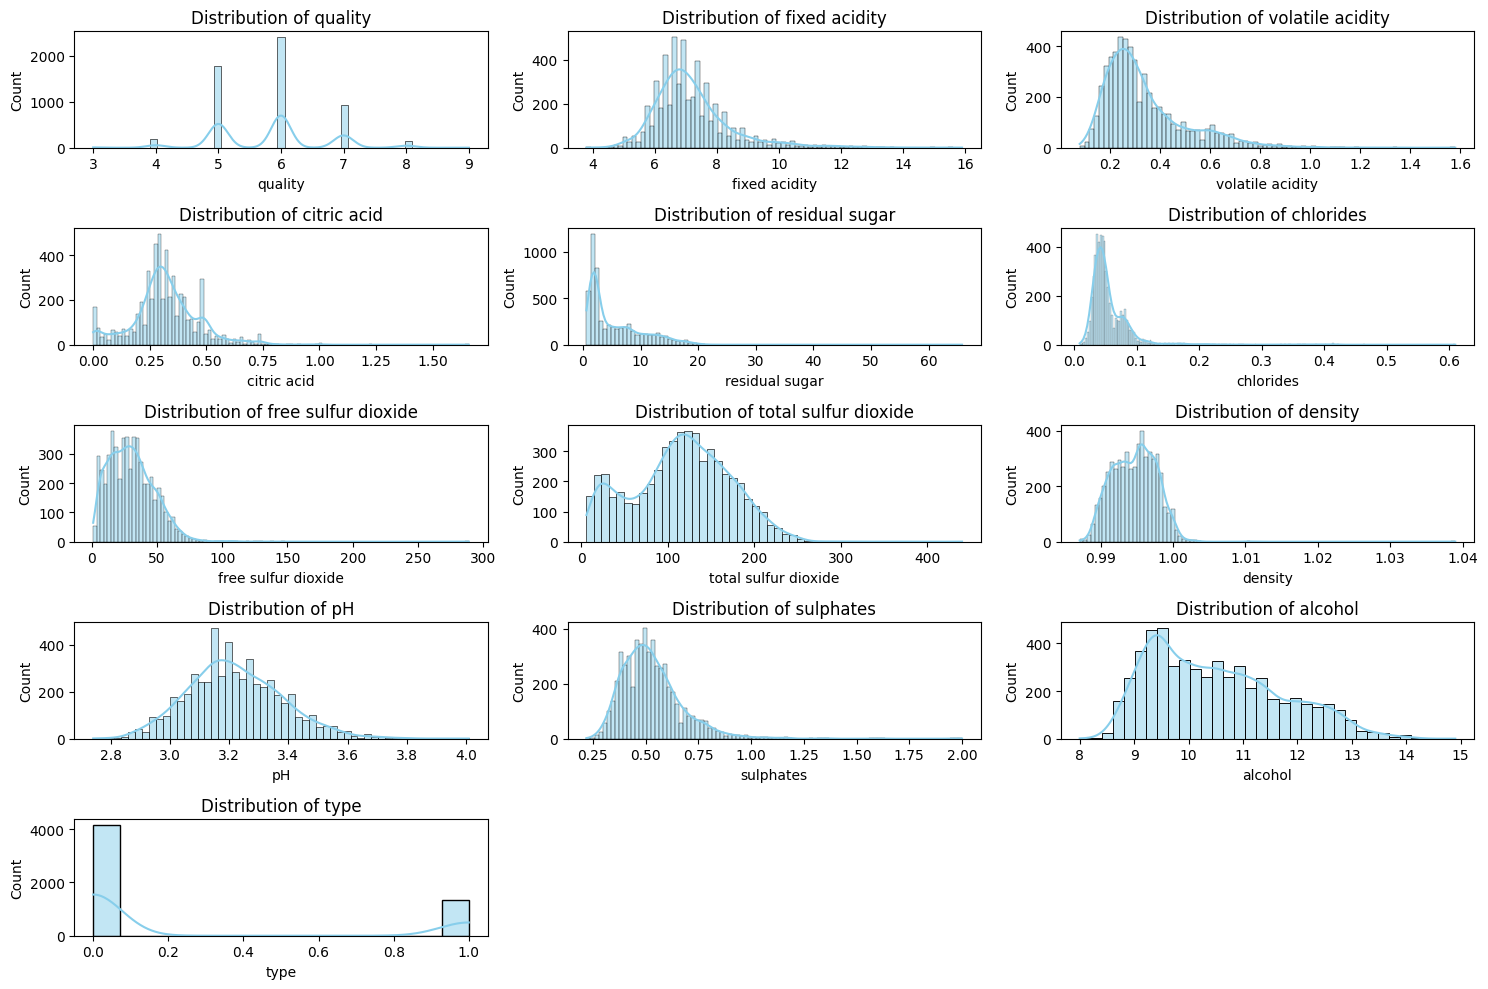

In [12]:
### 1. 히스토그램 + KDE
# 수치형 변수만 선택
numeric_cols = train.select_dtypes(include='number').columns.tolist()

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    sns.histplot(train[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

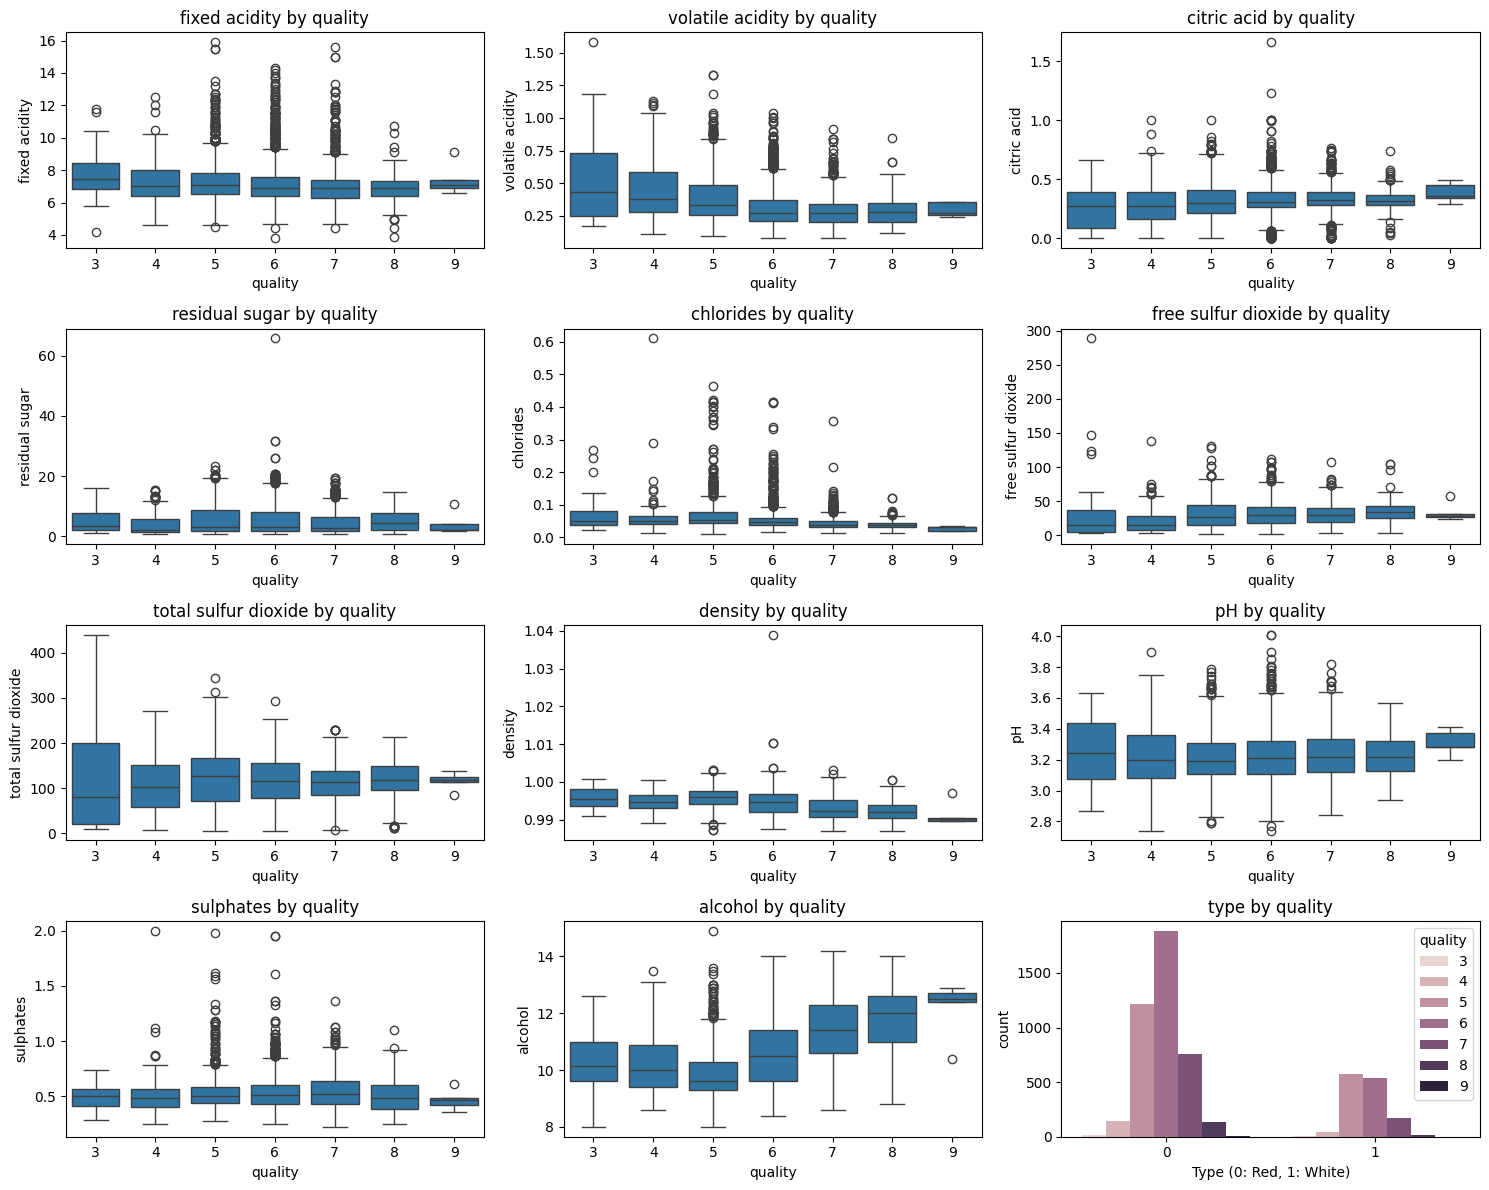

In [13]:
### 2. quality와 나머지 변수들 간의 관계 확인
num_cols=[col for col in train.columns if col != 'quality']

fig, axes=plt.subplots(nrows=4, ncols=3, figsize=(15, 12))
axes=axes.flatten()

for i, col in enumerate(num_cols):
    if col=='type':
        sns.countplot(x='type', hue='quality', data=train, ax=axes[i])
        axes[i].set_title('type by quality')
        axes[i].set_xlabel('Type (0: Red, 1: White)')
    else:
        sns.boxplot(x='quality', y=col, data=train, ax=axes[i])
        axes[i].set_title(f'{col} by quality')
plt.tight_layout()
plt.show()

✅ Quality가 높을수록 volatile acidity 값이 떨어지는 경향

-> 산도가 너무 높으면 품질이 낮게 평가됨

✅ 변화가 크지는 않지만 quality가 높을수록 citric acid 값이 증가하는 경향

-> 산미가 풍부한 와인의 품질이 더 높게 평가됨

✅ Quality가 5일 때부터 quality가 높을수록 alcohol 값이 증가하는 경향

-> 알코올 도수가 높은 와인의 품질이 더 높게 평가됨

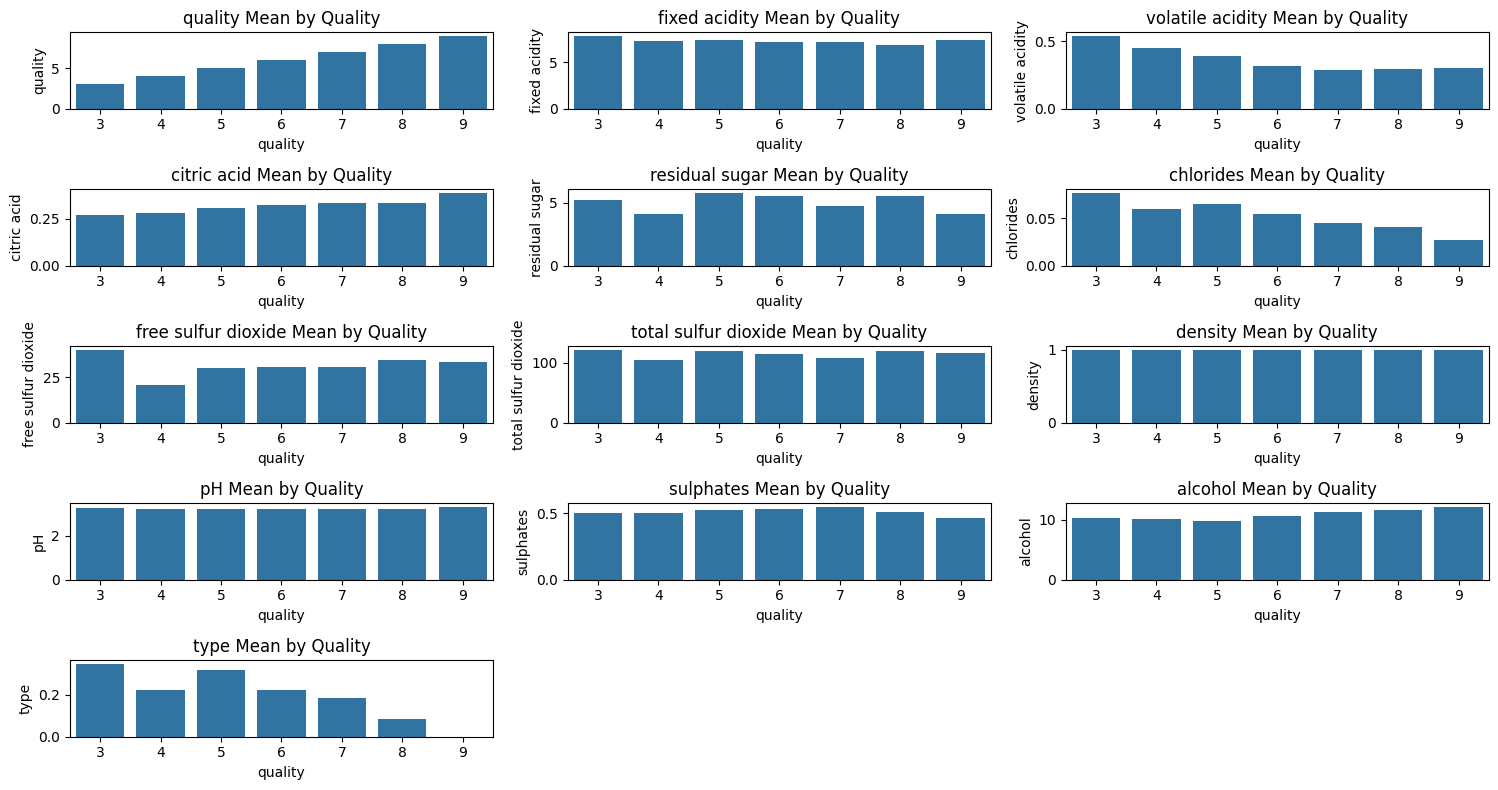

In [14]:
### 3. 품질별 피처 평균 막대그래프
grouped_means = train.groupby('quality')[numeric_cols].mean()
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols):
    plt.subplot((len(numeric_cols) + 2) // 3, 3, i + 1)
    sns.barplot(x=grouped_means.index, y=grouped_means[col])
    plt.title(f'{col} Mean by Quality')
plt.tight_layout()
plt.show()

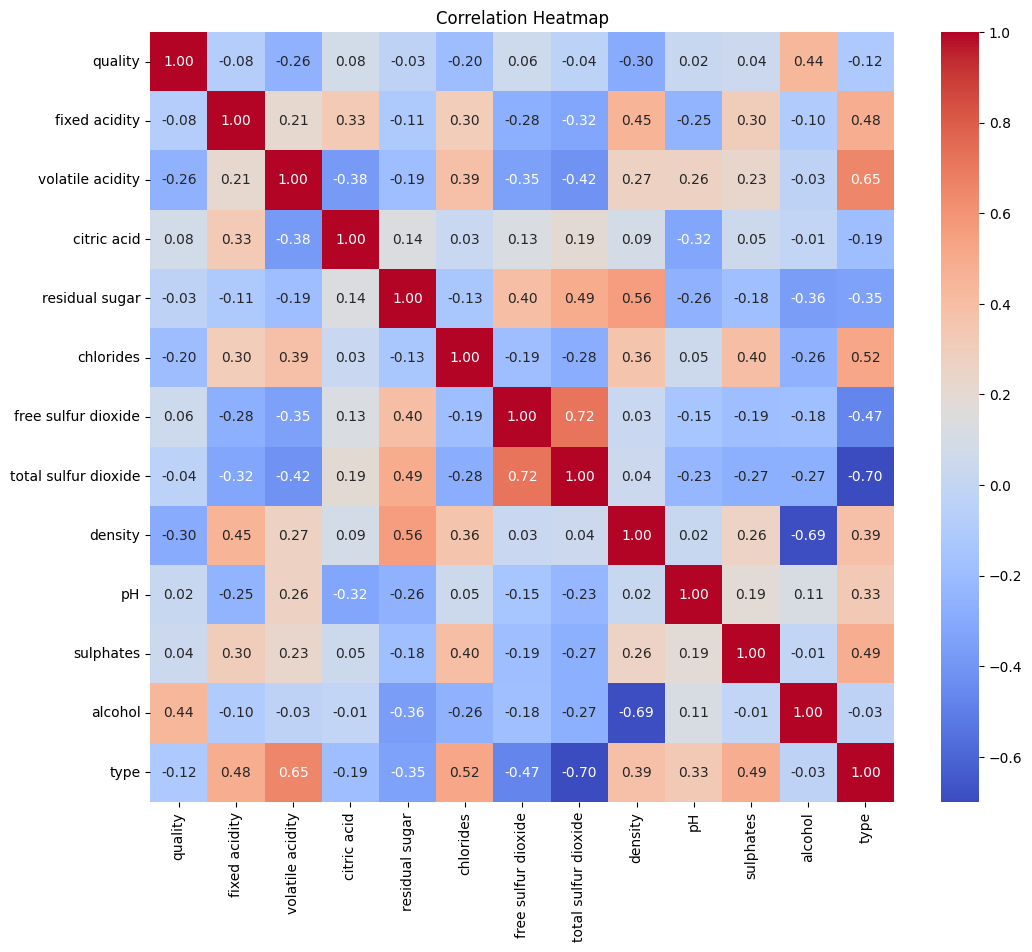

In [15]:
### 4. 상관관계 히트맵
plt.figure(figsize=(12, 10))
sns.heatmap(train[numeric_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Modeling

## **Random Forest**

### Import library

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 모델 생성 및 학습

In [17]:
X = train.drop('quality', axis=1)
y = train['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

rf_clf = RandomForestClassifier(class_weight='balanced', n_estimators = 150, random_state=42)

rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)

print('Accuracy for Random Forest: ', accuracy_score(y_test,pred))

Accuracy for Random Forest:  0.6963636363636364


In [18]:
test_pred = rf_clf.predict(test)
smpl_sub['quality'] = test_pred
smpl_sub.to_csv('rf_submit1.csv', index=False)

### GridSearchCV - hyperparameter tuning

In [19]:
params = {
    'n_estimators': [20,40,60,80],
    'max_depth': [20,40,60,80],
    'min_samples_split': [2,5,10]
}

grid_cv = GridSearchCV(
    RandomForestClassifier(random_state = 42),
    param_grid = params,
    cv = 5,
    scoring = 'accuracy',
    n_jobs = -1
)

grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV 최고 평균 정확도: 0.6461
GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 80}


In [20]:
# 최적 하이퍼 파라미터 classifier 적용
rf_clf2 = RandomForestClassifier(max_depth=20, min_samples_split=5, n_estimators=80)
rf_clf2.fit(X_train, y_train)

pred_2 = rf_clf2.predict(X_test)
pred_acc = accuracy_score(y_test, pred_2)
print('Accuracy for RandomForest:',pred_acc)

Accuracy for RandomForest: 0.6836363636363636


In [21]:
test_pred2 = rf_clf2.predict(test)
smpl_sub['quality'] = test_pred2
smpl_sub.to_csv('rf_submit2.csv', index=False)

하이퍼 파라미터 튜닝을 한 후 최고 평균 정확도가 0.6827으로 이전에 돌린 것보다 낮기 때문에 이전 RandomForestClassifier 사용.

### Feature Importance 확인

In [22]:
importances = rf_clf.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(feat_imp)

                 Feature  Importance
10               alcohol    0.112052
5    free sulfur dioxide    0.101215
6   total sulfur dioxide    0.100575
7                density    0.099731
4              chlorides    0.096829
1       volatile acidity    0.094079
0          fixed acidity    0.082951
2            citric acid    0.082599
3         residual sugar    0.076342
9              sulphates    0.075142
8                     pH    0.074573
11                  type    0.003912


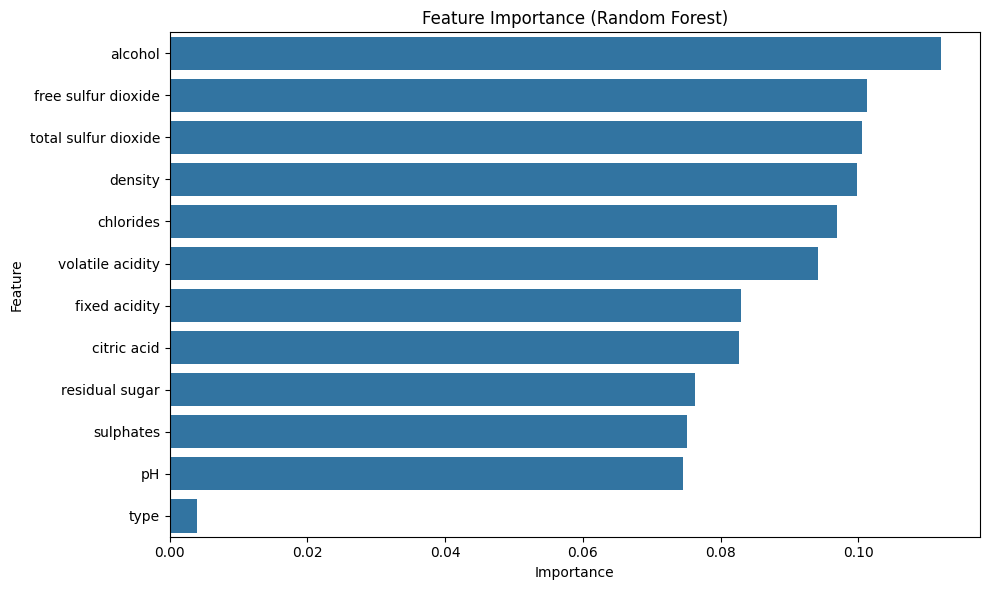

In [23]:
# feature importance 시각화
plt.figure(figsize = (10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()

'type'변수의 Feature importance가 매우 낮은 것을 확인할 수 있음. 'type'변수 제거 후 학습 진행.

In [24]:
X2 = train.drop(['quality','type'], axis=1)
y = train['quality']

X_train, X_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=0)

In [25]:
rf_clf3 = RandomForestClassifier(class_weight='balanced', n_estimators = 150, random_state=42)

rf_clf3.fit(X_train, y_train)
pred = rf_clf3.predict(X_test)

print('Accuracy for Random Forest: ', accuracy_score(y_test,pred))

Accuracy for Random Forest:  0.6909090909090909


'type'변수 제거해도 유의미한 정확도 증가가 나오지 않음.

✅ RandomForest의 최고 예측 정확도는 약 0.6964

✅ RandomForest 리더보드 최고 점수: 0.672

## **Decision Tree**

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [27]:
X = train.drop('quality', axis=1)
y = train['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# DecisionTree Classifier 생성
dt_clf = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf.fit(X_train, y_train)
y_pred = dt_clf.predict(X_test)
print(accuracy_score(y_test, y_pred))

0.5881818181818181


## scaler¶

In [28]:
# 1. 스케일링 적용
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 2. DecisionTreeClassifier 학습
dt_clf2 = DecisionTreeClassifier(random_state=42)
dt_clf2.fit(X_train_scaled, y_train)

# 3. 예측 및 평가
y_pred = dt_clf2.predict(X_test_scaled)
print("정확도:", accuracy_score(y_test, y_pred))

정확도: 0.5936363636363636


### scaling 후 정확도가 0.5791 -> 0.5927으로 별 차이가 없어 의미 없음

In [29]:
# 제출용 test 데이터셋 불러오기 (전처리 포함)
test = pd.read_csv('test.csv')
test = test.drop('index', axis=1)

# 문자열 컬럼 'type'을 숫자로 변환
if test['type'].dtype == 'object':
    test['type'] = test['type'].map({'white': 0, 'red': 1}).astype(int)

# 결측값 평균으로 채우기 (이제 모두 숫자이므로 가능)
test = test.fillna(test.mean())

# 제출용 예측 수행
submit_pred = dt_clf.predict(test)

# sample_submission 불러오기
smpl_sub = pd.read_csv('sample_submission.csv')

# 결과 저장
smpl_sub['quality'] = submit_pred
smpl_sub.to_csv('dt_submit.csv', index=False)

print("dt_submit.csv 저장 완료")

dt_submit.csv 저장 완료


## quality 분포 파악 후 이진화

In [30]:
y.value_counts()

,count
quality,
6,2416
5,1788
7,924
4,186
8,152
3,26
9,5


In [31]:
# 타겟 이진화: 7 이상이면 1, 그 외는 0
y_binary = y.apply(lambda x: 1 if x >= 7 else 0)

In [32]:
from sklearn.model_selection import train_test_split

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, stratify=y_binary, random_state=42)

In [33]:
# 모델 정의 및 학습
dt_clf3 = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt_clf3.fit(X_train, y_train)

# 예측
y_pred = dt_clf3.predict(X_test)

# 평가
print("정확도:", round(accuracy_score(y_test, y_pred), 4))

정확도: 0.8482


### binary 후 정확도가 0.5791 -> 0.8482 로 상승해 유의미한 preprocessing 이루어짐

✅ Decision Tree의 최고 예측 정확도는 약 0.8284

✅ Decision Tree 리더보드 최고 점수: 0.5791

## **Light GBM**

In [34]:
import lightgbm
from lightgbm import LGBMClassifier

###Feature / Target 분리 및 데이터 분할

In [35]:
# Feature, Target 분리
X = train.drop(columns=['quality'])
y = train['quality']

# 학습/검증용 데이터 분리
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                  test_size=0.2,
                                                  random_state=42,
                                                  stratify=y)

###LightGBM 모델 학습

In [36]:
# 기본 모델 학습
from sklearn.metrics import classification_report

model = LGBMClassifier(random_state=42)
model.fit(X_train, y_train)

# 검증 데이터 예측 및 평가
y_pred = model.predict(X_val)
print("Accuracy:", accuracy_score(y_val, y_pred))
print(classification_report(y_val, y_pred))

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000310 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1481
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.384731
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.822367
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits w

검증 데이터에서 전체적으로 약 62.18%의 정확도를 보임
- 클래스 5, 6, 7은 비교적 많이 등장하는 클래스이고 성능도 괜찮음 (f1-score ≥ 0.58)

- 클래스 3, 4는 데이터 개수 자체가 작아서 예측 성능이 거의 없음 (특히 class 3은 완전 실패)

###하이퍼파라미터 튜닝 (GridSearchCV 사용)

In [37]:
params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 10, -1]
}

grid = GridSearchCV(LGBMClassifier(random_state=42),
                    param_grid=params,
                    scoring='accuracy',
                    cv=3,
                    verbose=1,
                    n_jobs=-1)

grid.fit(X_train, y_train)

# 최적 하이퍼파라미터 및 성능 확인
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000166 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1481
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 12
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.384731
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.822367
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

###Feature Importance 시각화

<Figure size 1000x800 with 0 Axes>

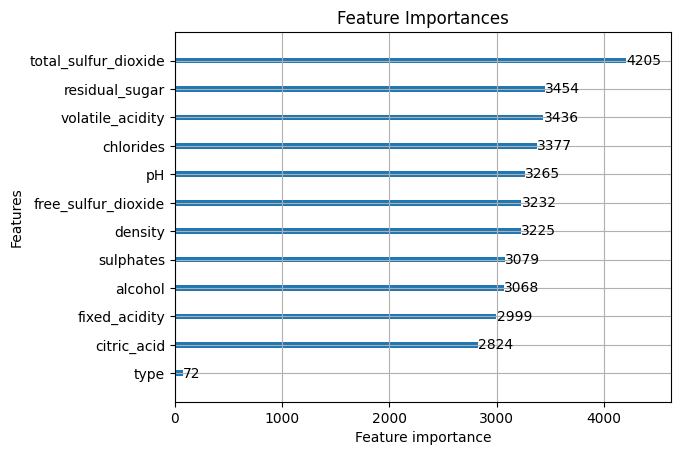

In [38]:
# 최적 모델로 재학습
best_model = grid.best_estimator_

# 중요도 시각화
from lightgbm import plot_importance

plt.figure(figsize=(10, 8))
plot_importance(best_model, max_num_features=15)
plt.title("Feature Importances")
plt.show()

type 변수 중요도가 매우 낮음:
다른 변수들이 3000~4000 이상인데 type은 72로 상대적으로 무시할 만한 수준임. -> type 변수 제거 후 GridSearchCV 재실행

type 변수 제거 및 데이터 분리

In [39]:
# type 변수 제거
X = train.drop(columns=['quality', 'type'])
y = train['quality']

# 학습 / 검증 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

GridSearchCV 재실행

In [40]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

# 하이퍼파라미터 후보군
params = {
    'learning_rate': [0.05, 0.1],
    'max_depth': [5, 10],
    'n_estimators': [100, 200]
}

# GridSearchCV 객체 정의
grid = GridSearchCV(
    LGBMClassifier(random_state=42),
    param_grid=params,
    scoring='accuracy',
    cv=3,
    verbose=1,
    n_jobs=-1
)

# 학습 실행
grid.fit(X_train, y_train)

# 결과 확인
print("Best Params:", grid.best_params_)
print("Best Score:", grid.best_score_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000562 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1479
[LightGBM] [Info] Number of data points in the train set: 4397, number of used features: 11
[LightGBM] [Info] Start training from score -5.344155
[LightGBM] [Info] Start training from score -3.384731
[LightGBM] [Info] Start training from score -1.123248
[LightGBM] [Info] Start training from score -0.822367
[LightGBM] [Info] Start training from score -1.783380
[LightGBM] [Info] Start training from score -3.584657
[LightGBM] [Info] Start training from score -7.002383
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with 

| 실험 조건     | Best Score | 하이퍼파라미터   |
| --------- | ---------- | --------- |
| `type` 포함 | 0.6270     | `lr=0.1`  |
| `type` 제거 | 0.6252     | `lr=0.05` |

type을 제거했을 때 정확도가 아주 소폭(0.18%) 하락

모델은 여전히 type 없이도 비슷한 성능을 내고 있음 → 영향 거의 X.

✅ LightGBM의 최고 예측 정확도는 약 0.627

✅ LightGBM 리더보드 최고 점수: 0.66

##**XGBoost**

### Import library

In [41]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 모델 생성 및 학습

In [42]:
X = train.drop('quality', axis=1)
y = train['quality']

le = LabelEncoder()
y_enc=le.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X, y_enc, test_size=0.2, random_state=42)

xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

val_pred = xgb_clf.predict(X_val)
val_acc = accuracy_score(y_val, val_pred)
print('Accuracy for XGBoost:', val_acc)

test_pred_enc = xgb_clf.predict(test)
test_pred = le.inverse_transform(test_pred_enc)

Accuracy for XGBoost: 0.6509090909090909


In [43]:
smpl_sub['quality'] = test_pred
smpl_sub.to_csv('xgb_submit1.csv', index=False)

### 하이퍼 파라미터 튜닝 - GridSearchCV

In [44]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}


xgb = XGBClassifier(random_state=42)

grid_cv = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_cv.fit(X_train, y_train)
print('GridSearchCV 최고 평균 정확도: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 3 folds for each of 48 candidates, totalling 144 fits
GridSearchCV 최고 평균 정확도: 0.6300
GridSearchCV 최적 하이퍼 파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}


최고 평균 정확도는 오히려 처음보다 감소한 것을 확인

In [45]:
#최적 하이퍼 파라미터 분류기에 직접 적용
xgb_clf2=XGBClassifier(n_estimators=200, max_depth=7, learning_rate=0.05, colsample_bytree=0.8, subsample=0.8)
xgb_clf2.fit(X_train, y_train)

val_pred = xgb_clf2.predict(X_val)
val_acc = accuracy_score(y_val, val_pred)
print('Accuracy for XGBoost:', val_acc)

test_pred_enc = xgb_clf2.predict(test)
test_pred = le.inverse_transform(test_pred_enc)

Accuracy for XGBoost: 0.6627272727272727


GridSearchCV로 찾은 최적 하이퍼 파라미터를 분류기에 직접 적용했을 때 정확도가 올라감을 확인

In [46]:
smpl_sub['quality'] = test_pred
smpl_sub.to_csv('xgb_submit2.csv', index=False)

### StratifiedKFold + GridSearchCV 동시 적용

In [47]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_cv = GridSearchCV(
    estimator=XGBClassifier(random_state=42),
    param_grid=param_grid,
    scoring='accuracy',
    cv=skf,
    verbose=2,
    n_jobs=-1
)

grid_cv.fit(X, y_enc)

print('GridSearchCV 최고 평균 정확도: {0:.4f}'.format(grid_cv.best_score_))
print('GridSearchCV 최적 하이퍼 파라미터:', grid_cv.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
GridSearchCV 최고 평균 정확도: 0.6685
GridSearchCV 최적 하이퍼 파라미터: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 10, 'n_estimators': 200, 'subsample': 0.8}


In [48]:
test_pred_enc = grid_cv.predict(test)
test_pred = le.inverse_transform(test_pred_enc)

smpl_sub['quality'] = test_pred
smpl_sub.to_csv('xgb_submit3.csv', index=False)

### Feature Importance 확인

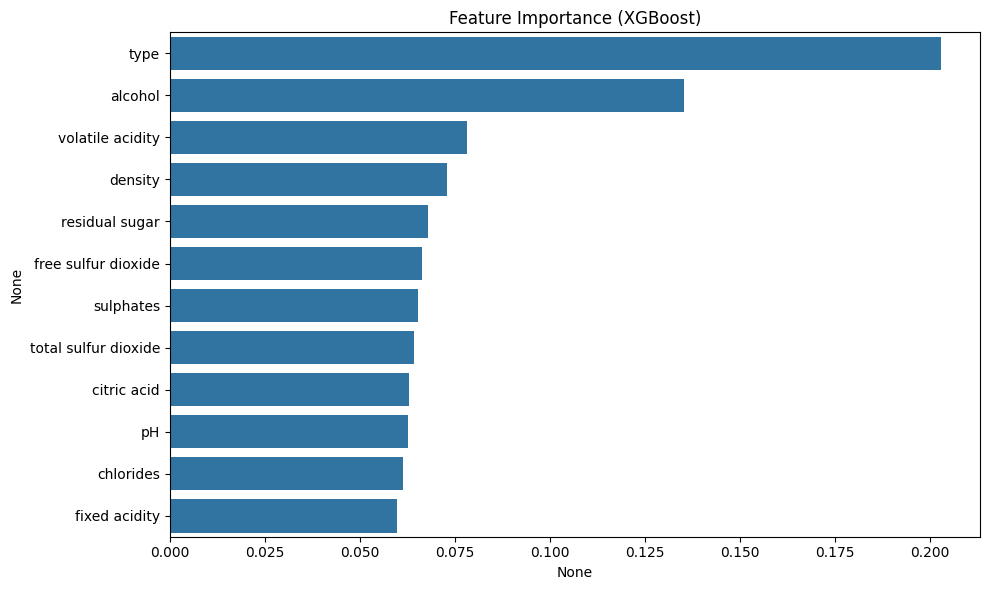

In [49]:
best_model=grid_cv.best_estimator_
ftr_importances_values=best_model.feature_importances_
ftr_importances=pd.Series(ftr_importances_values, index=X_train.columns)
ftr_top=ftr_importances.sort_values(ascending=False)

plt.figure(figsize = (10,6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.title("Feature Importance (XGBoost)")
plt.tight_layout()
plt.show()

Feature Importance가 지나치게 낮은 변수가 없다는 것을 확인, 제거할만한 변수가 없음

✅ XGBoost의 최고 예측 정확도는 약 0.6685

✅ XGBoost 리더보드 최고 점수: 0.696